#THE ECONOMICS OF HAPPINESS

##Context:

This year marks the 10th anniversary of the World Happiness Report, which uses global survey data to report how people evaluate their own lives in more than 150 countries worldwide. The World Happiness Report 2022 reveals a bright light in dark times. The pandemic brought not only pain and suffering but also an increase in social support and benevolence. As we battle the ills of disease and war, it is essential to remember the universal desire for happiness and the capacity of individuals to rally to each other’s support in times of great need. This index is based on respondent ratings of their own lives, which the report also correlates with various (quality of) life Links to an external site. factors. As of March 2022, Finland Links to an external site. had been ranked the happiest country in the world five times in a row.

The report is a publication of the Sustainable Development Solutions Network Links to an external site., a global initiative of the United Nations.[7] Links to an external site.The report primarily uses data from the Gallup World Poll Links to an external site.. Each annual report is available to the public to download on the World Happiness Report website.

##Objective:

This study's goal is to determine if the happiness score needs to be classified into Happy or Sad then which numeric value (in this case we are using mean, median, harmonic mean, geometric mean) should act as the border value for classfication.
What are the affects of using different border values on models and predictor importance. 

 

data frames are using in this research:

* TEH_World_Happiness_2015_2019_Imputed.csv
 

##Algorithms:

 

Regression - to predict the happiness index on a scale of 1-10 to determine how happy a country is.

Classification - to classify whether a country is happy or sad.

AutoML - to compare and tune the predictions generated by regression and classification models.

 

Algorithms include linear regression, logistic regression, decision trees, xgboost etc.

 

##Evaluation:

 

Identify the important predictor variables and their relationship with happiness

Compare various models using error metrics like MAE, RMSE

 

##Model Interpretation:

 

Feature importance considered to analyze the accuracy of model.

Feature selection based on different models and its relationship with the target variable i.e., Happiness index.

In [1]:
#Install AutoML library - PyCaret
#!pip install pycaret

In [2]:
#Installing SHAP and other required libraries
#!pip install shap
#!pip install numpy==1.20

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
# import math 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import shap
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Reading Data
Chateau_Montelena = pd.read_csv('/content/TEH_World_Happiness_2015_2019_Imputed.csv')

Chateau_Montelena_AutoML = Chateau_Montelena.copy()
Chateau_Montelena_M = Chateau_Montelena.copy()


In [4]:
Chateau_Montelena_AutoML.describe()

,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
count,782.000000,782.000000,777.000000,777.000000,777.000000,777.000000,777.000000,775.000000,782.000000
mean,78.698210,5.379018,0.921942,1.085332,0.616356,0.413736,0.219982,0.126407,2016.993606
std,45.182384,1.127456,0.401937,0.318999,0.244177,0.149757,0.121445,0.105646,1.417364
min,1.000000,2.693000,0.015300,0.104190,0.005565,0.005890,0.001990,0.001000,2015.000000
25%,40.000000,4.509750,0.619000,0.871190,0.443000,0.312000,0.133520,0.055000,2016.000000
50%,79.000000,5.322000,0.985000,1.125000,0.649547,0.432453,0.202000,0.092000,2017.000000
75%,118.000000,6.189500,1.238000,1.330000,0.809158,0.531220,0.279920,0.156352,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


The dataset has 1 Categorical and 9 Numerical Features.

What features are in the dataset?

* Country:  the name of the country whose Happiness score is determined.
* Happiness rank: rank calculated based on Happiness score.
* GDP per capita:  the extent to which GDP per capita contributes to Happiness Score.
* Healthy life:  the extent to which Healthy life contributes to Happiness Score.
* Social support:  the extent to which Social support contributes to Happiness Score.
* Freedom:  the extent to which Freedom (speach,media,express etc.) contributes to Happiness Score.
* Generosity:  the extent to which Generosity contributes to Happiness Score.
* Corruption:  the extent to which perception of Corruption contributes to Happiness Score.
* Year:  the year of the calculation of Happiness score.


Happiness Score is the target.

In [5]:
def tableinfo(Chateau_Montelena_AutoML):
    print(f"Dataset Shape: {Chateau_Montelena_AutoML.shape}")
    summary = pd.DataFrame(Chateau_Montelena_AutoML.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = Chateau_Montelena_AutoML.isnull().sum().values    
    summary['Uniques'] = Chateau_Montelena_AutoML.nunique().values
    summary['Sample Value'] = Chateau_Montelena_AutoML.loc[0].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(Chateau_Montelena_AutoML[name].value_counts(normalize=True), base=10),2)
    return summary
tableinfo(Chateau_Montelena)

Dataset Shape: (782, 10)


,Name,dtypes,Missing,Uniques,Sample Value,Entropy
0,Country,object,0,170,Switzerland,2.22
1,Happiness rank,int64,0,158,1,2.20
2,Happiness Score,float64,0,716,7.587,2.84
3,GDP per capita,float64,5,741,1.39651,2.86
4,Social support,float64,5,731,1.34951,2.85
5,Healthy life,float64,5,704,0.94143,2.83
6,Freedom,float64,5,696,0.66557,2.82
7,Generosity,float64,5,663,0.29678,2.79
8,Corruption,float64,7,634,0.41978,2.75
9,Year,int64,0,5,2015,0.70


In [6]:
print("Happiness Score(%):")
print(round(Chateau_Montelena['Happiness Score'].value_counts(normalize=True) * 100,2))

Happiness Score(%):
6.379    0.38
4.350    0.38
5.192    0.38
6.375    0.38
2.905    0.38
         ... 
4.508    0.13
4.459    0.13
4.415    0.13
4.404    0.13
2.853    0.13
Name: Happiness Score, Length: 716, dtype: float64


###Missing values - Knn Imputation

In [7]:
df_impute = Chateau_Montelena.drop(columns = ['Country', 'Happiness rank'])

In [8]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
imputer = KNNImputer(n_neighbors=5)
df_impute = pd.DataFrame(imputer.fit_transform(df_impute), columns = df_impute.columns)

df_impute.isnull().sum()

Happiness Score    0
GDP per capita     0
Social support     0
Healthy life       0
Freedom            0
Generosity         0
Corruption         0
Year               0
dtype: int64

###Calculating mean, median, geometric mean, harmonic mean

In [9]:
import statistics
dfmean = statistics.mean(df_impute['Happiness Score'])
dfmedian = statistics.median(df_impute['Happiness Score'])
dfhm=statistics.harmonic_mean(df_impute['Happiness Score'])
dfgm = statistics.geometric_mean(df_impute['Happiness Score'])

# Analyzing the numeric features

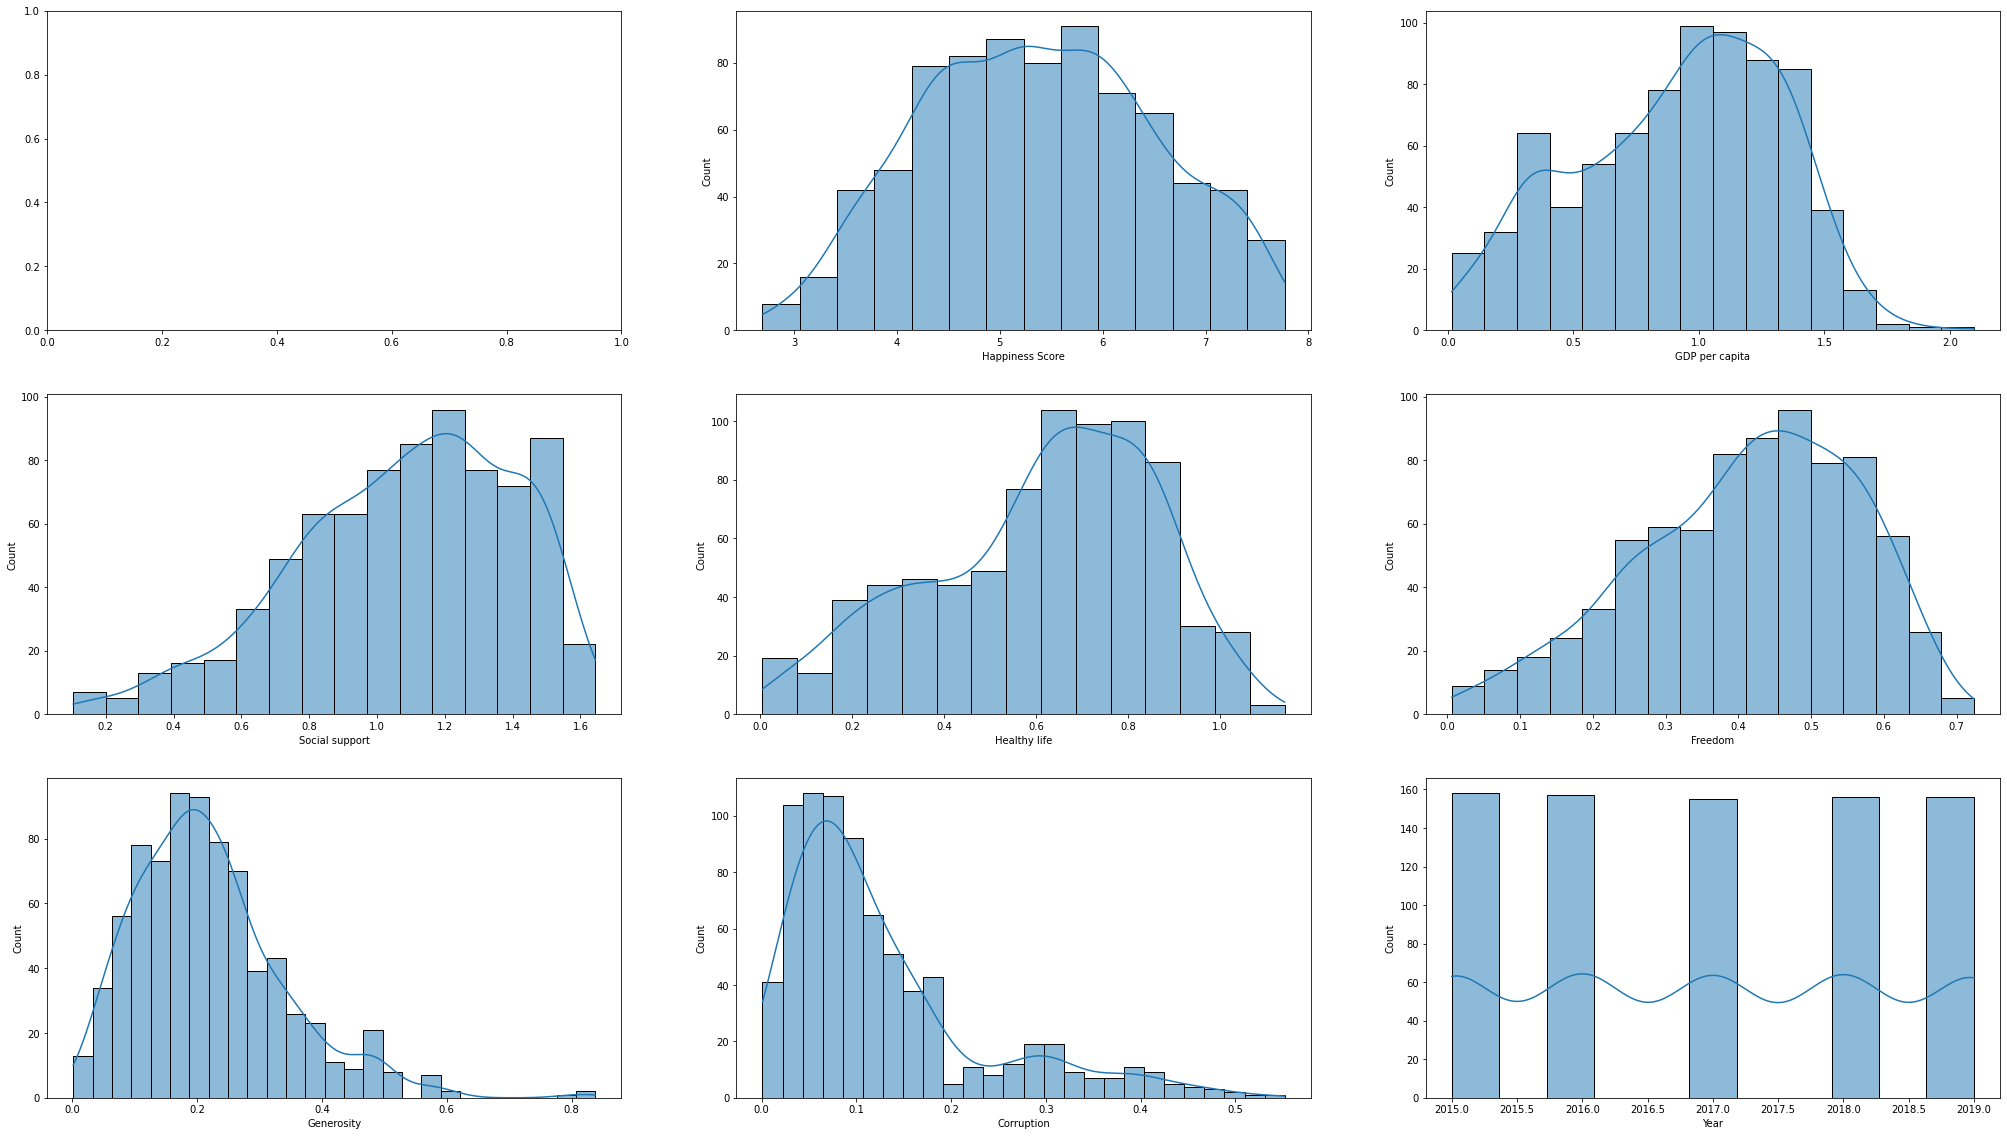

In [10]:
plot , ax = plt.subplots( 3,3 , figsize = (35 , 20))
g = sns.histplot(df_impute['Happiness Score'] , kde = True , ax = ax[0][1])
g = sns.histplot(df_impute['GDP per capita'] , kde = True , ax = ax[0][2])
g = sns.histplot(df_impute['Social support'] , kde = True , ax = ax[1][0])
g = sns.histplot(df_impute['Healthy life'] , kde = True , ax = ax[1][1])
g = sns.histplot(df_impute['Freedom'] , kde = True , ax = ax[1][2])
g = sns.histplot(df_impute['Generosity'] , kde = True , ax = ax[2][0])
g = sns.histplot(df_impute['Corruption'] , kde = True , ax = ax[2][1])
g = sns.histplot(df_impute['Year'] , kde = True , ax = ax[2][2])

Observation :

These numerical variables are not following a normal distribution. These distributions indicate there are different data distributions present in population data with separate and independent peaks.

Action :

Data scaling, As most of the algorithms assume the data to be normally (Gaussian) distributed we Normalize these features.

In [11]:
df_impute.head()

,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015.0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015.0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015.0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015.0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015.0


##MinMax transformation for outlier detection

In [12]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
df_impute['GDP per capita'] = mms.fit_transform(df_impute[['GDP per capita']])
df_impute['Social support'] = mms.fit_transform(df_impute[['Social support']])
df_impute['Healthy life']   = mms.fit_transform(df_impute[['Healthy life']])
df_impute['Freedom']        = mms.fit_transform(df_impute[['Freedom']])
df_impute['Generosity']     = mms.fit_transform(df_impute[['Generosity']])
df_impute['Corruption']     = mms.fit_transform(df_impute[['Corruption']])
df_impute['Year']           = mms.fit_transform(df_impute[['Year']])

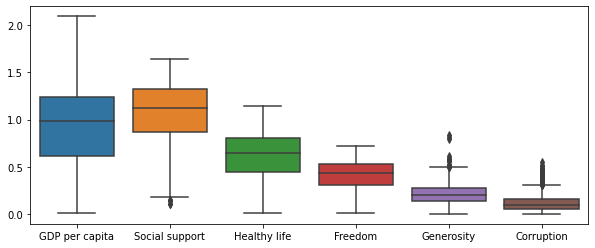

In [13]:
plt.figure(figsize=(10,4))
sns.boxplot(data=Chateau_Montelena[['GDP per capita',
'Social support',
'Healthy life',  
'Freedom',       
'Generosity',   
'Corruption'   ]])

### Correlation of features with Target Label

In [14]:
df_corr = df_impute.copy()
# df_corr = df_corr.drop(columns='Happiness rank')

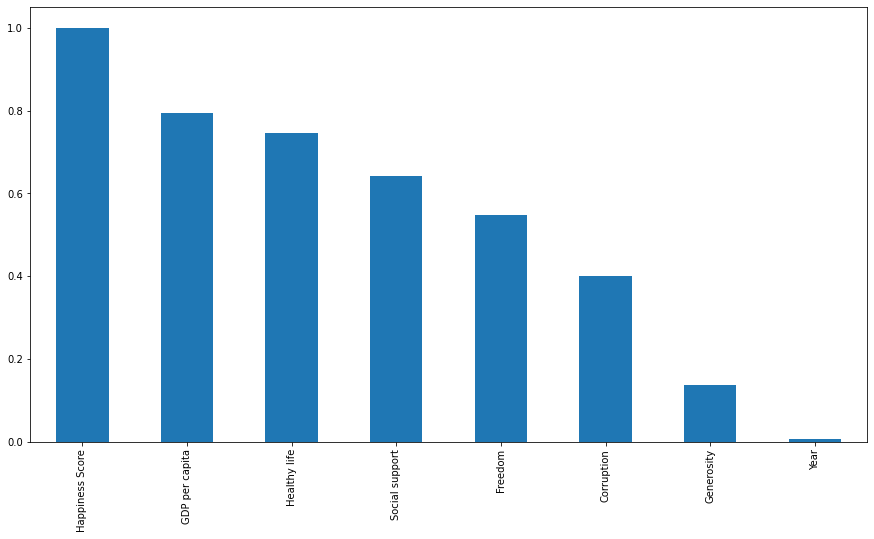

In [15]:
plt.figure(figsize=(15,8))
df_corr.corr()['Happiness Score'].sort_values(ascending = False).plot(kind='bar')

**Observation**:
* GDP per capital, Healthy Life seem to be most positively correlated with Happiness Score. 

##Multicolinearity

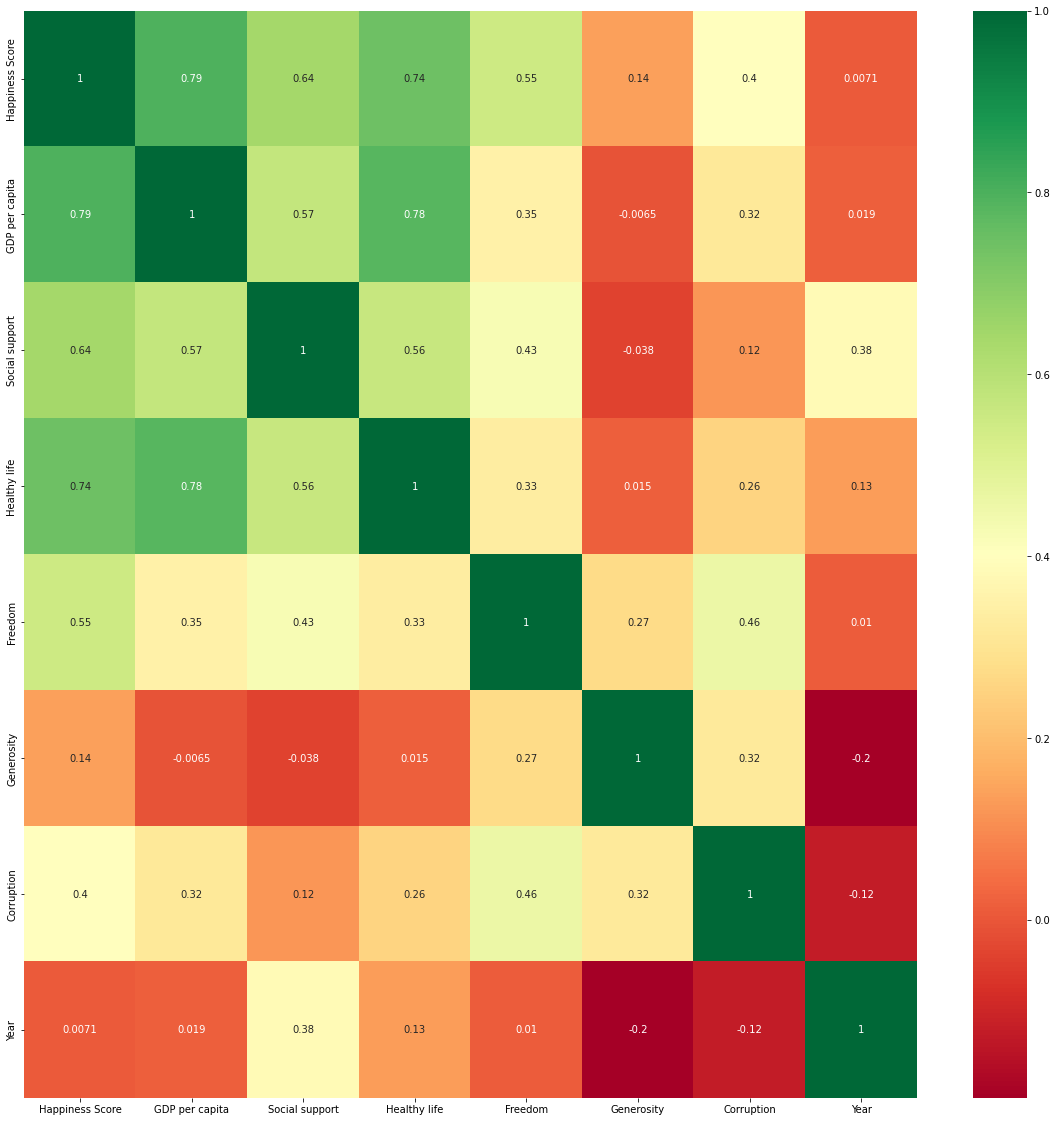

In [16]:
corrmat = df_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heatmap
g = sns.heatmap(df_corr[top_corr_features].corr(), annot= True, cmap='RdYlGn')

**Observation :**

By looking at the correlation mattrix above we can gain the following insights:

* GDP per capita is highly (+ve) correlated with Healthy Life.
* Generosity is (-ve) correlated with Year.

**Action :**

Dropping some of the highly correlated predictor variables.

In [17]:
pred=df_corr.copy()
score=pred['Happiness Score']
pred.drop(columns='Happiness Score',inplace=True)

### OLS Regression to identify Predictor Significance
**Ordinary Least Squares regression (OLS)** is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).

In [18]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(score, pred).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              5378.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:00:10   Log-Likelihood:                         -915.88
No. Observations:                 782   AIC:                                      1846.
Df Residuals:                     775   BIC:                                      1878.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
GDP per capita     2.4811      0.254      9.750      0.000       1.982       2.981
Social support     2.3651      0.193     12.239      0.000       1.986       2.744
Healthy life       1.8173      0.215      8.471      0.000       1.396       2.238
Freedom            1.8847      0.166     11.371      0.000       1.559       2.210
Generosity         2.1382      0.195     10.976      0.000       1.756       2.521
Corruption         0.1476      0.177      0.834      0.404      -0.200       0.495
Year               0.0497      0.089      0.555      0.579      -0.126       0.225
==============================================================================
Omnibus:                        0.513   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.607
Skew:                          -0.017   Prob(JB):                        0.738
Kurtosis:                       2.868   Cond. No.                         14.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation :**

We will considering the significance value of 0.05.

All the predictor variables except fixed acidity have a p-value less than 0.05 and hence they are significant features.

### Creating Train & Test Splits

In [19]:
# Chateau_Montelena.drop([9])
df_x,df_y = pred, score
df_x.shape

(782, 7)

In [20]:
#Splitting the dataset after outlier treatment into Train and Test sets at 80-20 proportion
from sklearn.model_selection import train_test_split
Xclean_train, Xclean_test, yclean_train, yclean_test = train_test_split(df_x, df_y, test_size=0.2,random_state=42)

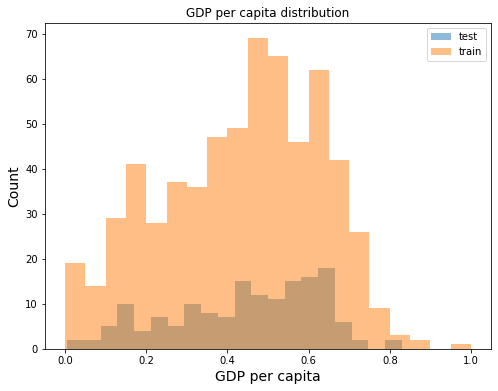

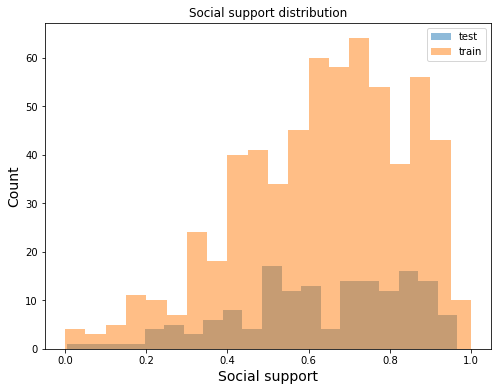

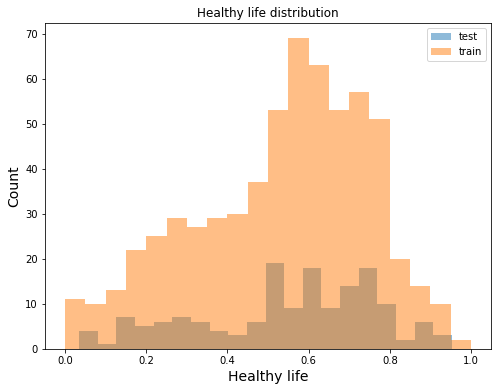

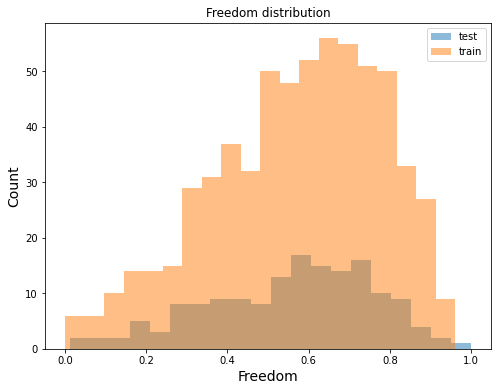

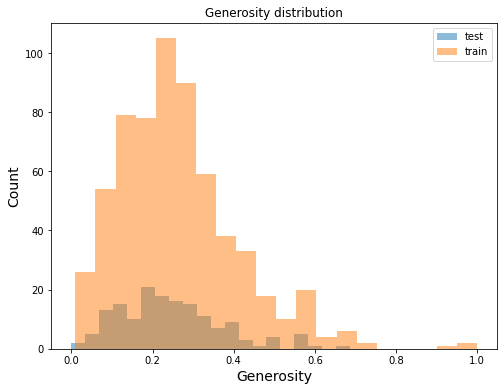

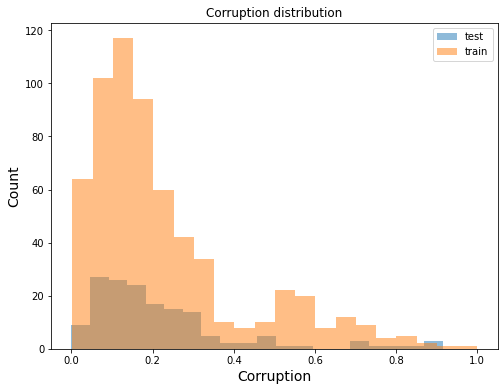

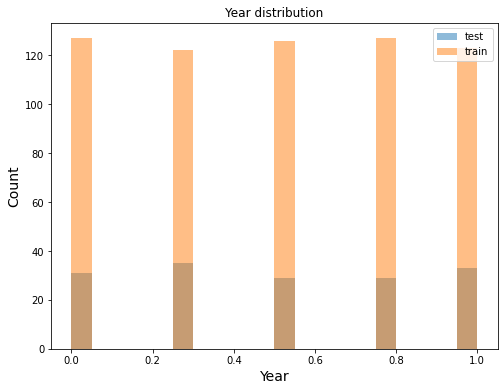

In [21]:
# Looking the data for training and test set
X_test_plot = Xclean_test.copy()
X_train_plot = Xclean_train.copy()

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

##Linear regression, RandomForest Regression, Decision Trees Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(Xclean_train, yclean_train)
lrclean_pred= lr.predict(Xclean_test)
# model2 = RandomForestRegressor(random_state=1, n_estimators=1000)
model2 = RandomForestRegressor(random_state=1, n_estimators=1000)
model2.fit(Xclean_train, yclean_train)
Rmclean_pred = model2.predict(Xclean_test)
model3 = DecisionTreeRegressor(max_depth=6)
dt =model3.fit(Xclean_train, yclean_train)
Dtclean_pred = model3.predict(Xclean_test)


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
print('-------------Linear Regression-----------')

print('--Phase-1--')
mae1 = mean_absolute_error(yclean_test, lrclean_pred)
print('MAE: %f'% mae1)
rmse1 = np.sqrt(mean_squared_error(yclean_test, lrclean_pred))
print('RMSE: %f'% rmse1)
r21 = r2_score(yclean_test, lrclean_pred)   
print('R2: %f' % r21)

print('-------------Random forest-----------')

print('--Phase-1--')
mae2 = mean_absolute_error(yclean_test, Rmclean_pred)
print('MAE: %f'% mae2)
rmse2 = np.sqrt(mean_squared_error(yclean_test, Rmclean_pred))
print('RMSE: %f'% rmse2)
r22 = r2_score(yclean_test, Rmclean_pred)   
print('R2: %f' % r22)

print('-------------Descision Tree-----------')

print('--Phase-1--')
mae3 = mean_absolute_error(yclean_test, Dtclean_pred)
print('MAE: %f'% mae3)
rmse3 = np.sqrt(mean_squared_error(yclean_test, Dtclean_pred))
print('RMSE: %f'% rmse3)
r23 = r2_score(yclean_test, Dtclean_pred)   
print('R2: %f' % r23)



-------------Linear Regression-----------
--Phase-1--
MAE: 0.427316
RMSE: 0.556496
R2: 0.745402
-------------Random forest-----------
--Phase-1--
MAE: 0.395657
RMSE: 0.501023
R2: 0.793630
-------------Descision Tree-----------
--Phase-1--
MAE: 0.503730
RMSE: 0.643033
R2: 0.660063


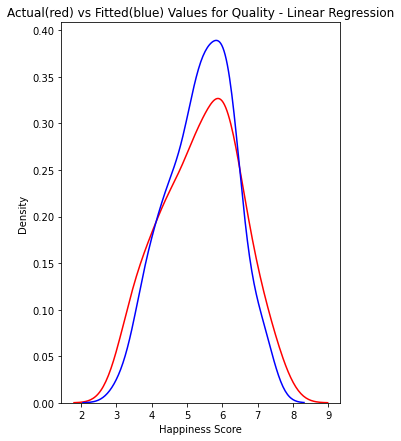

In [24]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(yclean_test, hist=False, color="r", label="Actual Value")
sns.distplot(lrclean_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual(red) vs Fitted(blue) Values for Quality - Linear Regression')


plt.show()
plt.close()

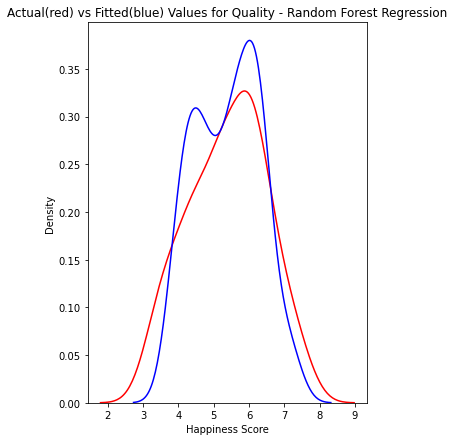

In [25]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(yclean_test, hist=False, color="r", label="Actual Value")
sns.distplot(Rmclean_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual(red) vs Fitted(blue) Values for Quality - Random Forest Regression')


plt.show()
plt.close()

##Interpreting nodes of decision tree

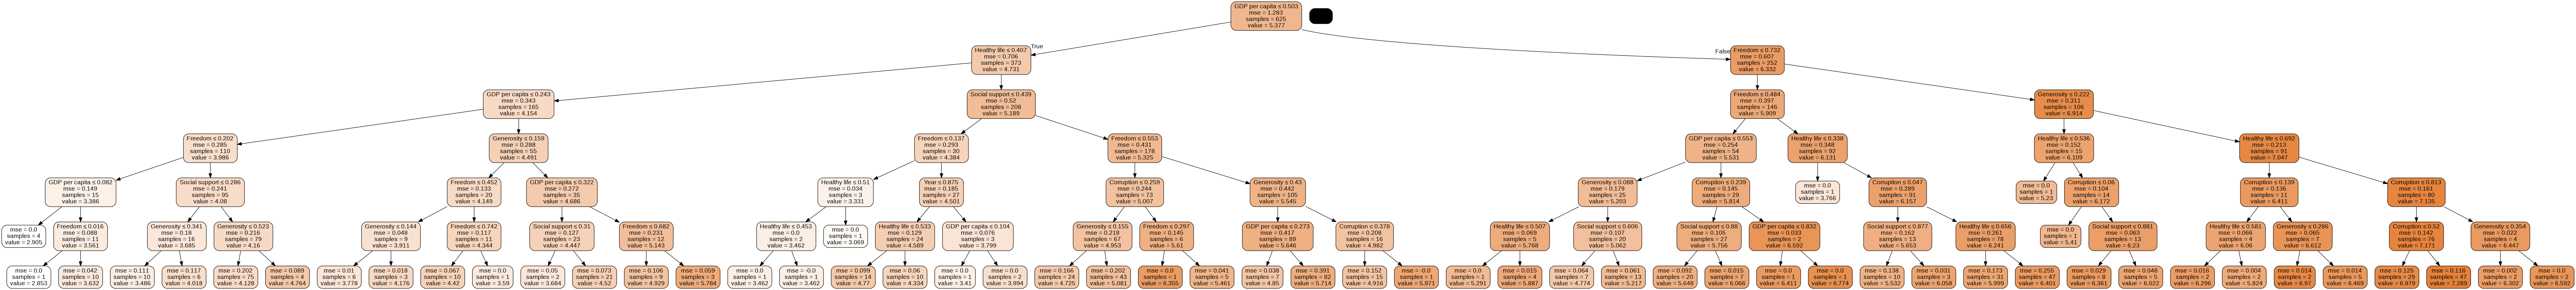

In [26]:
from six import StringIO
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Observation :**

* Gini Index is a score that evaluates how accurate a split is among the classified groups.
* Here we have limited the depth of the decision tree to 7 splits for simple interpretation.

### Feature Importance - Decision Tree

In [27]:
importance = dt.feature_importances_

In [28]:
#Creating a dict of feature and their importance
feature_importance = {}
for i, feature in enumerate(Xclean_train.columns):
    feature_importance[feature] = round(importance[i], 3)

feat_df = pd.DataFrame({'Feature':feature_importance.keys(),'Importance':feature_importance.values()})

In [29]:
feat_df.sort_values(by='Importance',ascending=False).head(10)

,Feature,Importance
0,GDP per capita,0.586
2,Healthy life,0.164
3,Freedom,0.145
1,Social support,0.043
4,Generosity,0.040
5,Corruption,0.020
6,Year,0.002


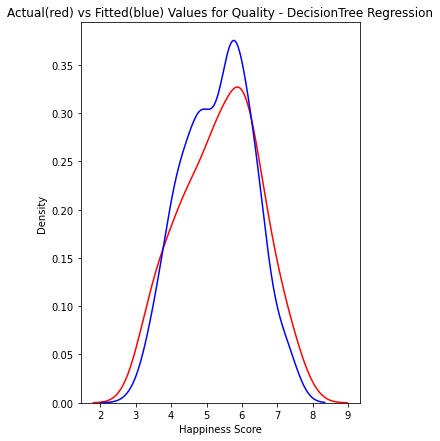

In [30]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(yclean_test, hist=False, color="r", label="Actual Value")
sns.distplot(Dtclean_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual(red) vs Fitted(blue) Values for Quality - DecisionTree Regression')


plt.show()
plt.close()

# AutoML
### PyCaret
* PyCaret is an open-source low-code machine learning library in Python that aims to reduce the time needed for experimenting with different machine learning models.
* PyCaret empowers anyone to build low-code, powerful, end-to-end machine learning solutions.

We will be using the PyCaret library to Automate solving a machine learning model.
We will perform the following:
1. data preprocessing and preparation
2. build multiple ML models
3. evaluate the model performance
4. hyperparameter tuning
5. blend multiple models to attain highly accuracte models

In [31]:
df_auto = Chateau_Montelena_AutoML.drop(columns=['Happiness rank','Country'])
X = df_auto.copy()
X = X.drop(columns='Happiness Score')
y = df_auto['Happiness Score'].copy()

In [32]:
from pycaret.regression import *
s = setup(df_auto, target = 'Happiness Score',train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             silent = True, numeric_features = [
'GDP per capita',
'Social support',
'Healthy life',  
'Freedom',       
'Generosity',   
'Corruption',    
'Year'    ])

,Description,Value
0,session_id,2903
1,Target,Happiness Score
2,Original Data,"(782, 8)"
3,Missing Values,True
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(593, 7)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['GDP per capita',
                                                          'Social support',
                                                          'Healthy life',
                                                          'Freedom',
                                                          'Generosity',
                                                          'Corruption',
                                                          'Year'],
                                      target='Happiness Score',
                                      time_featu

### Model Comparison & Evaluation

In [33]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3851,0.2445,0.4930,0.7887,0.0829,0.0776,0.228
rf,Random Forest Regressor,0.4032,0.2679,0.5168,0.7685,0.0865,0.0810,0.318
lightgbm,Light Gradient Boosting Machine,0.4077,0.2710,0.5192,0.7658,0.0872,0.0821,0.178
gbr,Gradient Boosting Regressor,0.4162,0.2803,0.5280,0.7578,0.0884,0.0834,0.106
ridge,Ridge Regression,0.4282,0.2976,0.5449,0.7428,0.0907,0.0855,0.014
br,Bayesian Ridge,0.4272,0.2979,0.5451,0.7425,0.0909,0.0853,0.014
lr,Linear Regression,0.4270,0.2981,0.5453,0.7423,0.0910,0.0852,0.634
lar,Least Angle Regression,0.4270,0.2981,0.5453,0.7423,0.0910,0.0852,0.016
huber,Huber Regressor,0.4276,0.2997,0.5468,0.7408,0.0913,0.0856,0.022
knn,K Neighbors Regressor,0.4360,0.3148,0.5606,0.7282,0.0930,0.0877,0.018


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2903, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


### Hyperparameter Tuning

In [34]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4165,0.2873,0.5360,0.7496,0.0903,0.0842
1,0.4015,0.2562,0.5061,0.7880,0.0839,0.0803
2,0.4299,0.2704,0.5200,0.7571,0.0848,0.0843
3,0.4688,0.3671,0.6059,0.6741,0.1007,0.0938
4,0.4230,0.2929,0.5412,0.7569,0.0918,0.0867
Mean,0.4279,0.2948,0.5418,0.7451,0.0903,0.0859
Std,0.0225,0.0384,0.0343,0.0379,0.0060,0.0045


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=5,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.0001, min_impurity_split=None,
                    min_samples_leaf=3, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
                    oob_score=False, random_state=2903, verbose=0,
                    warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [35]:
tuned_model.predict

<bound method ForestRegressor.predict of ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=5,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.0001, min_impurity_split=None,
                    min_samples_leaf=3, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
                    oob_score=False, random_state=2903, verbose=0,
                    warm_start=False)>

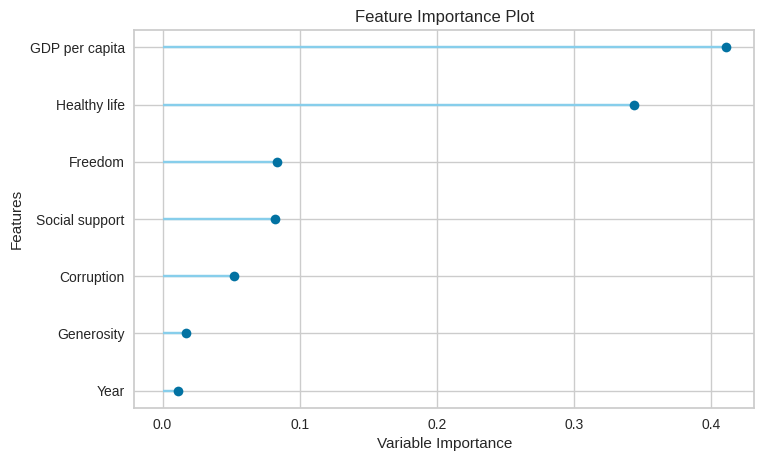

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [36]:
plot_model(estimator = tuned_model, plot = 'feature')

#Observation#
* GDP and Healthy Life are the most signification predicator variables.

# Model Interpretability

### SHAP

* SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model

* The Shapley value is a method used in game theory that involves fairly distributing both gains and costs to actors working in a coalition

* Since each actor contributes differently to the coalition, the Shapley value makes sure that each actor gets a fair share depending on how much they contribute


In [37]:
X100 = shap.utils.sample(pred, 100) # 100 instances for use as the background distribution
sample_ind = 20

In [38]:
explainer_log = shap.Explainer(tuned_model.predict, X100)

In [39]:
# compute the SHAP values for the linear model
shap_values_log = explainer_log(pred)

Exact explainer: 783it [02:35,  4.80it/s]


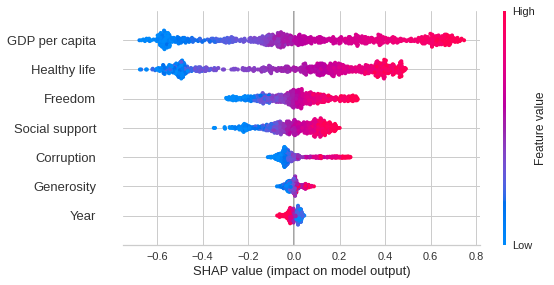

In [40]:
shap.plots.beeswarm(shap_values_log)

In a Beeswarm plot,

For each variable, every instance of the dataset appears as it's own point, the points are distributed across the x-axis according to their SHAP values.
The input variables are ranked from the top in accordance to their mean SHAP values.
Here GDP and Healthy Life are the top features,

* With increase in the GDP and Healthy Life, Happiness score increases.
* with increase in year, the Happiness score decreases

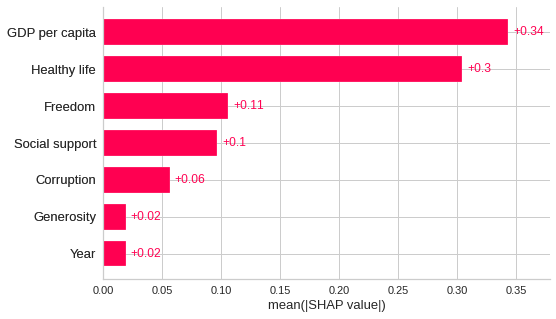

In [41]:
shap.plots.bar(shap_values_log)

Displaying the average SHAP values of each individual feature. 

**Observation:**

Here we see that GDP and Healthy Life are the most influential variable, contributing on average 0.32 and 0.27 respectively to predict Happiness score.

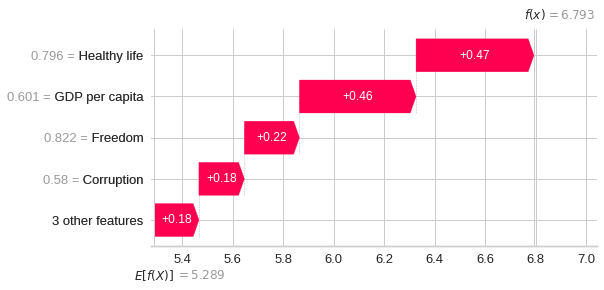

In [42]:
shap.plots.waterfall(shap_values_log[sample_ind], max_display=5)

Here, we plot an example and see how the predictor variables impact the probability of a wine quality.
* Example, here GDP increases the Happiness score by 0.49 when Happiness scpre is 6.438

#Partial Dependency
Keeping one attribute constant, all other attributes are changed which gives us the dependency of the constant variable on the target variable.

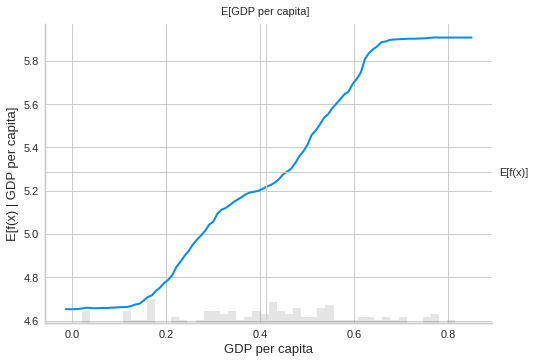

In [43]:
shap.partial_dependence_plot(
    "GDP per capita", tuned_model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Happiness score increases exponentially with GDP for the most part aprt from start and end.

##Classfiying Happy/Sad on Mean

In [44]:
df_mean=Chateau_Montelena.drop(columns={'Country','Happiness rank'})

In [45]:

df_mean["Happiness Score"] = np.where(df_mean["Happiness Score"] >= dfmean, 1, 0)


In [46]:
df_mean.head()

,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,1,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,1,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,1,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,1,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,1,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [47]:
from pycaret.classification import *
clfb = setup(data = df_mean, 
             target = 'Happiness Score',
            #  ignore_features = ['customerID'],
             train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             silent = True,numeric_features = [
'GDP per capita',
'Social support',
'Healthy life',  
'Freedom',       
'Generosity',   
'Corruption',    
'Year'    ])

,Description,Value
0,session_id,2507
1,Target,Happiness Score
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(782, 8)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['GDP per capita',
                                                          'Social support',
                                                          'Healthy life',
                                                          'Freedom',
                                                          'Generosity',
                                                          'Corruption',
                                                          'Year'],
                                      target='Happiness Score',
      

In [48]:
best_modela=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8870,0.9495,0.8776,0.8869,0.8812,0.7734,0.7753,0.270
et,Extra Trees Classifier,0.8853,0.9525,0.8846,0.8786,0.8809,0.7702,0.7713,0.218
lightgbm,Light Gradient Boosting Machine,0.8802,0.9504,0.8636,0.8854,0.8735,0.7598,0.7613,0.058
gbc,Gradient Boosting Classifier,0.8785,0.9493,0.8530,0.8919,0.8707,0.7562,0.7588,0.134
ada,Ada Boost Classifier,0.8752,0.9423,0.8672,0.8745,0.8693,0.7499,0.7523,0.112
lr,Logistic Regression,0.8633,0.9490,0.8740,0.8485,0.8587,0.7263,0.7305,0.024
ridge,Ridge Classifier,0.8582,0.0000,0.8986,0.8261,0.8595,0.7170,0.7223,0.016
qda,Quadratic Discriminant Analysis,0.8582,0.9411,0.8497,0.8559,0.8521,0.7159,0.7171,0.014
lda,Linear Discriminant Analysis,0.8582,0.9473,0.8951,0.8278,0.8589,0.7169,0.7217,0.020
svm,SVM - Linear Kernel,0.8533,0.0000,0.8008,0.8991,0.8364,0.7049,0.7216,0.016


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2507, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**Observation:**
* Random Forest classifer performs the best.

In [49]:
tuned_modela = tune_model(best_modela)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8655,0.9460,0.7895,0.9184,0.8491,0.7291,0.7359
1,0.9328,0.9892,0.9825,0.8889,0.9333,0.8659,0.8703
2,0.9244,0.9661,0.8966,0.9455,0.9204,0.8485,0.8495
3,0.7881,0.8795,0.7895,0.7759,0.7826,0.5760,0.5761
4,0.8983,0.9733,0.9123,0.8814,0.8966,0.7966,0.7971
Mean,0.8818,0.9508,0.8740,0.8820,0.8764,0.7632,0.7658
Std,0.0524,0.0383,0.0749,0.0577,0.0550,0.1050,0.1056


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=-1, oob_score=False, random_state=2507, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [50]:
tuned_modela.predict

<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=-1, oob_score=False, random_state=2507, verbose=0,
                       warm_start=False)>

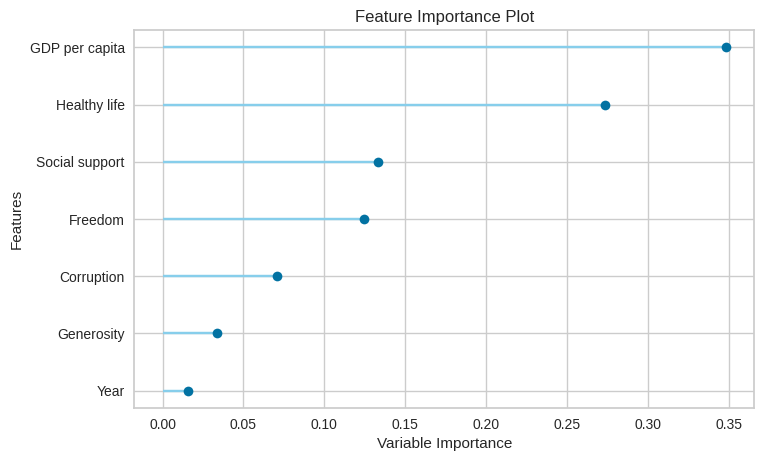

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [51]:
plot_model(estimator = tuned_modela, plot = 'feature')

**Observation :**
* GDP has the most predictor variable importance.

##Classfiying Happy/Sad on Median

In [52]:
df_median=Chateau_Montelena.drop(columns={'Country','Happiness rank'})
df_median["Happiness Score"] = np.where(df_median["Happiness Score"] >= dfmedian, 1, 0)
from pycaret.classification import *
clfmedian = setup(data = df_median, 
             target = 'Happiness Score',
            #  ignore_features = ['customerID'],
             train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             silent = True,numeric_features = [
'GDP per capita',
'Social support',
'Healthy life',  
'Freedom',       
'Generosity',   
'Corruption',    
'Year'    ])

,Description,Value
0,session_id,6333
1,Target,Happiness Score
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(782, 8)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['GDP per capita',
                                                          'Social support',
                                                          'Healthy life',
                                                          'Freedom',
                                                          'Generosity',
                                                          'Corruption',
                                                          'Year'],
                                      target='Happiness Score',
      

In [53]:
best_modelmedian=compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8904,0.9597,0.9051,0.8812,0.8915,0.7808,0.7840,0.210
lightgbm,Light Gradient Boosting Machine,0.8887,0.9599,0.8983,0.8821,0.8894,0.7776,0.7789,0.058
gbc,Gradient Boosting Classifier,0.8803,0.9524,0.8780,0.8838,0.8798,0.7607,0.7625,0.140
ridge,Ridge Classifier,0.8769,0.0000,0.9153,0.8516,0.8812,0.7540,0.7585,0.014
rf,Random Forest Classifier,0.8769,0.9541,0.8881,0.8697,0.8777,0.7539,0.7562,0.254
lda,Linear Discriminant Analysis,0.8769,0.9478,0.9186,0.8498,0.8817,0.7541,0.7592,0.018
lr,Logistic Regression,0.8753,0.9491,0.8983,0.8596,0.8775,0.7506,0.7533,0.026
qda,Quadratic Discriminant Analysis,0.8736,0.9511,0.8712,0.8763,0.8728,0.7472,0.7488,0.018
ada,Ada Boost Classifier,0.8601,0.9376,0.8610,0.8620,0.8598,0.7202,0.7230,0.108
nb,Naive Bayes,0.8550,0.9408,0.8610,0.8513,0.8554,0.7101,0.7114,0.016


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6333, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**Observation :**
* Gradient boosting performs the best.

In [54]:
tuned_modelmedian = tune_model(best_modelmedian)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8824,0.9627,0.8814,0.8814,0.8814,0.7647,0.7647
1,0.8487,0.9508,0.8644,0.8361,0.8500,0.6975,0.6979
2,0.8655,0.9285,0.9492,0.8116,0.8750,0.7315,0.7420
3,0.8898,0.9474,0.8644,0.9107,0.8870,0.7797,0.7807
4,0.8898,0.9581,0.8983,0.8833,0.8908,0.7797,0.7798
Mean,0.8753,0.9495,0.8915,0.8646,0.8768,0.7506,0.7530
Std,0.0160,0.0118,0.0314,0.0357,0.0144,0.0318,0.0309


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=4, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=280, n_jobs=-1,
                     oob_score=False, random_state=6333, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [55]:
tuned_modelmedian.predict


<bound method ForestClassifier.predict of ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=4, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=280, n_jobs=-1,
                     oob_score=False, random_state=6333, verbose=0,
                     warm_start=False)>

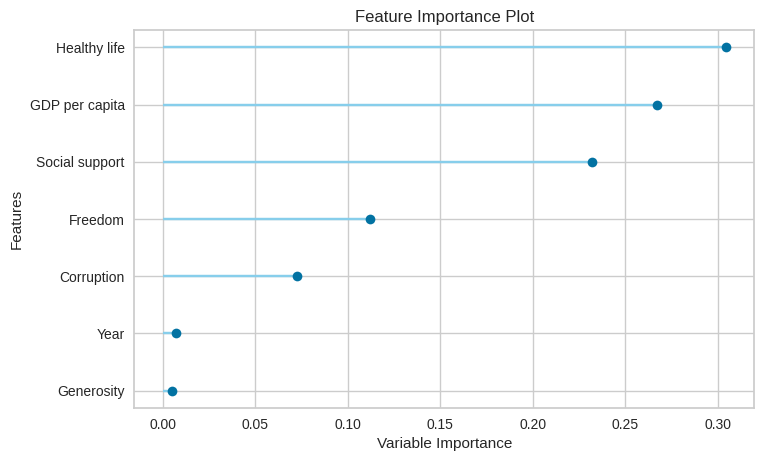

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [56]:
plot_model(estimator = tuned_modelmedian, plot = 'feature')

**Observation :**
* GDP has the most predictor variable importance but the importance of healthy life has decreased as compared to mean.

##Classfiying Happy/Sad on Harmonic mean

In [57]:
df_hm=Chateau_Montelena.drop(columns={'Country','Happiness rank'})
df_hm["Happiness Score"] = np.where(df_hm["Happiness Score"] >= dfhm, 1, 0)
from pycaret.classification import *
clfhm=setup(data = df_hm, 
             target = 'Happiness Score',
            #  ignore_features = ['customerID'],
             train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             silent = True,numeric_features = [
'GDP per capita',
'Social support',
'Healthy life',  
'Freedom',       
'Generosity',   
'Corruption',    
'Year'    ])


,Description,Value
0,session_id,7872
1,Target,Happiness Score
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(782, 8)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['GDP per capita',
                                                          'Social support',
                                                          'Healthy life',
                                                          'Freedom',
                                                          'Generosity',
                                                          'Corruption',
                                                          'Year'],
                                      target='Happiness Score',
      

In [58]:
best_modelhm=compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8954,0.9521,0.9297,0.9004,0.9143,0.7801,0.7822,0.212
lightgbm,Light Gradient Boosting Machine,0.8820,0.9485,0.9184,0.8886,0.9031,0.7521,0.7534,0.060
rf,Random Forest Classifier,0.8752,0.9479,0.9073,0.8884,0.8973,0.7383,0.7397,0.264
gbc,Gradient Boosting Classifier,0.8719,0.9420,0.9128,0.8788,0.8953,0.7303,0.7317,0.136
knn,K Neighbors Classifier,0.8668,0.9274,0.9157,0.8704,0.8921,0.7184,0.7209,0.026
qda,Quadratic Discriminant Analysis,0.8617,0.9297,0.8932,0.8788,0.8857,0.7107,0.7115,0.016
ada,Ada Boost Classifier,0.8567,0.9278,0.8903,0.8737,0.8817,0.6999,0.7008,0.112
lr,Logistic Regression,0.8534,0.9331,0.9185,0.8501,0.8827,0.6880,0.6926,0.024
ridge,Ridge Classifier,0.8534,0.0000,0.9072,0.8583,0.8815,0.6895,0.6930,0.016
lda,Linear Discriminant Analysis,0.8517,0.9288,0.9044,0.8580,0.8800,0.6862,0.6895,0.018


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7872, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**Observation :**
* Extra trees classfier performs the best.

In [59]:
tuned_modelhm = tune_model(best_modelhm)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8487,0.9049,0.8873,0.8630,0.8750,0.6836,0.6840
1,0.8403,0.9190,0.8028,0.9194,0.8571,0.6781,0.6861
2,0.8908,0.9648,0.8889,0.9275,0.9078,0.7739,0.7750
3,0.8814,0.9476,0.8873,0.9130,0.9000,0.7542,0.7547
4,0.8559,0.9314,0.8169,0.9355,0.8722,0.7089,0.7174
Mean,0.8634,0.9335,0.8567,0.9117,0.8824,0.7197,0.7234
Std,0.0194,0.0210,0.0385,0.0255,0.0187,0.0382,0.0364


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=3, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                     oob_score=False, random_state=7872, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [60]:
tuned_modelhm.predict


<bound method ForestClassifier.predict of ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=3, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                     oob_score=False, random_state=7872, verbose=0,
                     warm_start=False)>

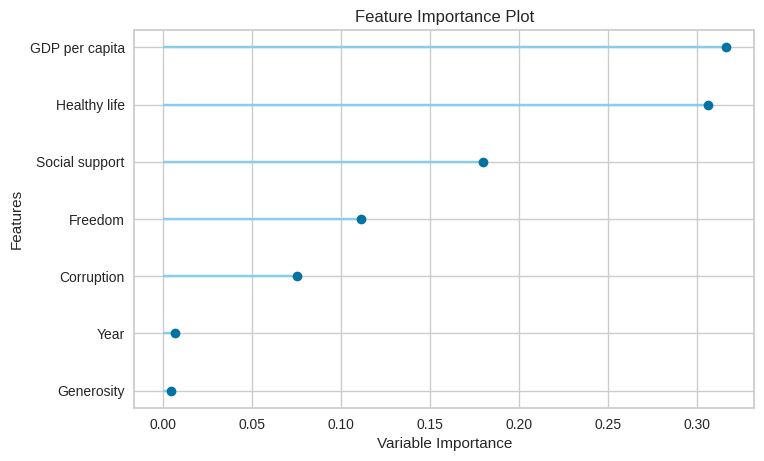

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [61]:
plot_model(estimator = tuned_modelhm, plot = 'feature')

**Observation :**
* GDP, Healthy life and Social support have the most predictor variable importance.

##Classfiying Happy/Sad on Geometric mean

In [62]:
df_gm=Chateau_Montelena.drop(columns={'Country','Happiness rank'})
df_gm["Happiness Score"] = np.where(df_gm["Happiness Score"] >= dfgm, 1, 0)
from pycaret.classification import *
clfgm=setup(data = df_gm, 
             target = 'Happiness Score',
            #  ignore_features = ['customerID'],
             train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             silent = True,numeric_features = [
'GDP per capita',
'Social support',
'Healthy life',  
'Freedom',       
'Generosity',   
'Corruption',    
'Year'    ])


,Description,Value
0,session_id,3073
1,Target,Happiness Score
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(782, 8)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['GDP per capita',
                                                          'Social support',
                                                          'Healthy life',
                                                          'Freedom',
                                                          'Generosity',
                                                          'Corruption',
                                                          'Year'],
                                      target='Happiness Score',
      

In [63]:
best_modelgm=compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8685,0.9376,0.8812,0.8763,0.8784,0.7353,0.7360,0.212
lr,Logistic Regression,0.8635,0.9397,0.9031,0.8545,0.8769,0.7239,0.7280,0.018
knn,K Neighbors Classifier,0.8601,0.9052,0.9062,0.8473,0.8751,0.7167,0.7203,0.034
lightgbm,Light Gradient Boosting Machine,0.8601,0.9355,0.8781,0.8658,0.8713,0.7180,0.7194,0.064
rf,Random Forest Classifier,0.8600,0.9380,0.8875,0.8589,0.8720,0.7177,0.7202,0.268
ridge,Ridge Classifier,0.8550,0.0000,0.9125,0.8361,0.8715,0.7059,0.7122,0.016
gbc,Gradient Boosting Classifier,0.8550,0.9291,0.8781,0.8578,0.8667,0.7079,0.7105,0.134
nb,Naive Bayes,0.8534,0.9302,0.8906,0.8481,0.8672,0.7036,0.7082,0.014
qda,Quadratic Discriminant Analysis,0.8500,0.9297,0.8531,0.8669,0.8591,0.6987,0.7003,0.018
lda,Linear Discriminant Analysis,0.8483,0.9368,0.9094,0.8290,0.8661,0.6919,0.6989,0.016


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3073, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**Observation :**
* Extra trees classifier performs the best.

In [64]:
tuned_modelgm = tune_model(best_modelgm)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8655,0.9369,0.8906,0.8636,0.8769,0.7289,0.7293
1,0.8571,0.9418,0.9219,0.8310,0.8741,0.7100,0.7152
2,0.8571,0.9091,0.8438,0.8852,0.8640,0.7137,0.7147
3,0.8475,0.9430,0.8125,0.8966,0.8525,0.6954,0.6990
4,0.9237,0.9754,0.9375,0.9231,0.9302,0.8461,0.8463
Mean,0.8702,0.9412,0.8812,0.8799,0.8795,0.7388,0.7409
Std,0.0274,0.0211,0.0470,0.0311,0.0268,0.0547,0.0536


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=10, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=270, n_jobs=-1,
                     oob_score=False, random_state=3073, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [65]:
tuned_modelgm.predict


<bound method ForestClassifier.predict of ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=10, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=270, n_jobs=-1,
                     oob_score=False, random_state=3073, verbose=0,
                     warm_start=False)>

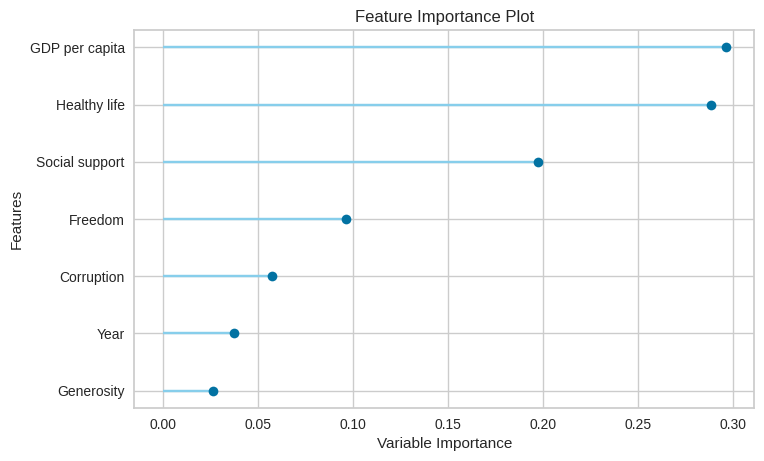

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [66]:
plot_model(estimator = tuned_modelgm, plot = 'feature')

**Observation :**
* GDP, Healthy life and Social support have the most predictor variable importance.

# Conclusion:

* We applied a Liner,RandomForest, DecisionTree Regression and tried to interpret their co-efficients and nodes respectively.
* We use an AutoML Library to determine the best model, tuned it and got the predictor importance.
* We use the SHAP library to determine the impact of features on predicting Happiness Score.
* We classified the Happiness Score into Happy/Sad based on different border values and interpreted the impact on model selection and feature importance. Extra trees classifer in classifcation based on harmonic mean performs the best with 0.9143 f1 score.

# License

**References*** 
* https://pycaret.org
* https://pycaret.readthedocs.io/en/stable/api/classification.html

Copyright (c) 2022 indoriarishabh25

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.